# Data pull

Aim to pull data with tsget.py script and to test its functionality.

A CSV file of data provider codes and pulls is maintained in ~/alex/datascienceprojects/macro_visualisations/ref_data/

So far I have the following
- Bund constant maturity yields for 1, 2, 3, 4, 5, 7, 10, 15, 20, 30y
- Gilt constant maturity nomonial, zc, inflation breakeven and real yields for 5, 10, 20y



In [1]:
from datavis import tsget as tg

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import pandas as pd

# %matplotlib notebook
%matplotlib inline

## Quick tester to see if quandl code is working

In [2]:
static = tg.get_data_codes()
static.at['gukg10ycry','provider_code']

'BOE/IUDMRZC'

In [3]:
import quandl as qd
from pandas_datareader import data
qd.ApiConfig.api_key = "Pn4VQFgZqt6Uid7qWa_p"

test_df = qd.get('BOE/IUDMRZC',start_date=dt(2016,1,1),
                 end_date=dt(2017,1,1))
test_df.tail()

,Value
Date,
2016-12-22,-1.8245
2016-12-23,-1.8499
2016-12-28,-1.8865
2016-12-29,-1.9415
2016-12-30,-1.9639


## Use TimeSeries() class to create TimeSeries objects

Examples:
* egeg5ycpy - eur german govt bond 5y constant maturity par yield
* gukg10ycry - gbp uk govt bond 10y constant maturity real yield 


In [4]:
csv = tg.get_data_codes()
csv.loc['egeg5ycpy','data_provider']

'quandl'

In [5]:
bund_5y = tg.TimeSeries(code='egeg5ycpy')
print(bund_5y.start)
print(bund_5y.name)
print(bund_5y.original_data_supplier)
print(bund_5y.timeseries.tail())
print()

gilt_ry_10y = tg.TimeSeries(code='gukg10yczy',start=dt(2019,6,1))
print(gilt_ry_10y.start)
print(gilt_ry_10y.asset_type)
print(gilt_ry_10y.maturity_unit)
print(gilt_ry_10y.timeseries.tail())

2019-01-01 00:00:00
bund_5y
bundesbank
            Value
Date             
2019-11-11  -0.54
2019-11-12  -0.53
2019-11-13  -0.56
2019-11-14  -0.58
2019-11-15  -0.60

2019-06-01 00:00:00
government_bond
year
             Value
Date              
2019-11-07  0.7480
2019-11-08  0.7736
2019-11-11  0.7844
2019-11-12  0.7934
2019-11-13  0.7377


In [6]:
bunds = tg.yield_curve()
bunds.tail()

,bund_1y,bund_2y,bund_3y,bund_4y,bund_5y,bund_7y,bund_10y,bund_15y,bund_20y,bund_30y
Date,,,,,,,,,,
2019-11-11,-0.64,-0.64,-0.62,-0.59,-0.54,-0.43,-0.26,-0.05,0.10,0.26
2019-11-12,-0.64,-0.65,-0.63,-0.58,-0.53,-0.41,-0.24,-0.01,0.15,0.31
2019-11-13,-0.64,-0.65,-0.64,-0.60,-0.56,-0.45,-0.29,-0.07,0.07,0.23
2019-11-14,-0.65,-0.66,-0.65,-0.62,-0.58,-0.49,-0.33,-0.11,0.04,0.20
2019-11-15,-0.66,-0.67,-0.66,-0.64,-0.60,-0.49,-0.33,-0.11,0.03,0.18


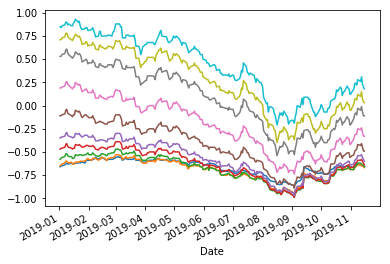

In [7]:
bunds.plot(legend=False)

## Create objects for economic data specifying data revisions

In [8]:
nfp = tg.Data_Releases('udnfp_total',revisions=[0,1],revs_from_last=[0])

In [9]:
nfp.timeseries.tail(10)

releases    values                        release_dates  \
           releases     rev_0     rev_1 rev_0th_last         rev_0   
date                                                                 
2019-01-01        3  150574.0  150586.0     150587.0    2019-02-01   
2019-02-01        3  150606.0  150620.0     150643.0    2019-03-08   
2019-03-01        3  150816.0  150832.0     150796.0    2019-04-05   
2019-04-01        3  151095.0  151020.0     151012.0    2019-05-03   
2019-05-01        3  151095.0  151084.0     151074.0    2019-06-07   
2019-06-01        3  151308.0  151267.0     151252.0    2019-07-05   
2019-07-01        3  151431.0  151411.0     151418.0    2019-08-02   
2019-08-01        3  151541.0  151586.0     151637.0    2019-09-06   
2019-09-01        2  151722.0  151817.0          NaN    2019-10-04   
2019-10-01        1  151945.0       NaN          NaN    2019-11-01   

                                                     [CHECK!]_release_no  \
                          rev_1         rev_0th_last               rev_0   
date                                                                       
2019-01-01  2019-03-08 00:00:00  2019-04-05 00:00:00                   1   
2019-02-01  2019-04-05 00:00:00  2019-05-03 00:00:00                   1   
2019-03-01  2019-05-03 00:00:00  2019-06-07 00:00:00                   1   
2019-04-01  2019-06-07 00:00:00  2019-07-05 00:00:00                   1   
2019-05-01  2019-07-05 00:00:00  2019-08-02 00:00:00                   1   
2019-06-01  2019-08-02 00:00:00  2019-09-06 00:00:00                   1   
2019-07-01  2019-09-06 00:00:00  2019-10-04 00:00:00                   1   
2019-08-01  2019-10-04 00:00:00  2019-11-01 00:00:00                   1   
2019-09-01  2019-11-01 00:00:00                  NaN                   1   
2019-10-01                  NaN                  NaN                   1   

                               
           rev_1 rev_0th_last  
date                           
2019-01-01     2            3  
2019-02-01     2            3  
2019-03-01     2            3  
2019-04-01     2            3  
2019-05-01     2            3  
2019-06-01     2            3  
2019-07-01     2            3  
2019-08-01     2            3  
2019-09-01     2            2  
2019-10-01     1            1

### Calc to get original reported NFP change

In [10]:
nfp_change = nfp.timeseries[('values','rev_0')] - nfp.timeseries.shift(periods=1)[('values','rev_1')]

In [11]:
nfp_change.tail(10)

date
2019-01-01    304.0
2019-02-01     20.0
2019-03-01    196.0
2019-04-01    263.0
2019-05-01     75.0
2019-06-01    224.0
2019-07-01    164.0
2019-08-01    130.0
2019-09-01    136.0
2019-10-01    128.0
dtype: float64

Need to reindex the series to be useful for back tests etc.

In [19]:
nfp_change = pd.DataFrame(nfp_change, columns=['value'])
nfp_change['data_point'] = nfp_change.index
nfp_change.index = nfp.timeseries[('release_dates','rev_0')]
nfp_change.tail()

,value,data_point
"(release_dates, rev_0)",,
2019-07-05,224.0,2019-07-05
2019-08-02,164.0,2019-08-02
2019-09-06,130.0,2019-09-06
2019-10-04,136.0,2019-10-04
2019-11-01,128.0,2019-11-01
